## Tips for Kaggale Competition 
1. We have 3 data files generally: Train | Test | sample_submission_file
2. Check the sample_submission file to see the
    - `format of output`. 
    - The variable to predict 
    - Mostly there is `ID` column in this file representing the `ID` of row in test file
3. Check the type of Problem: Classification/Regression/other 
    - Make the histogram of target variable from train data
    - `train['target'].hist()` 
    - Check if it is **Continous or Discrete**
    
4. We can directly give the Dataframe and Series to `model.fit(X=df[["feat-1", "feat-2"]], y=df['target'])`

5. Good Practice 
    - We have test_df which has all features except the target variable to predict
        - You can put the predictions in this same dataframe 
        - `test_df['target'] = model.predict(test_df[['feat-1', 'feat-2']])`
        - Then you can use this dataframe to save the submission file 
        - `test_df[['id', 'target']].to_csv("file_name.csv", index=false)`
        
6. Public and Private Leaderboard 
    - Test data is divided by kaggle into Public test data and Private test data(hidden from us)
    - During the competition, results are calculated only on the Public test. After the competition is over results are calculated on the Private test set. 
        - This can lead to `Overfitting` 
    - During the competition we see performance on Public test data, so we try to improve it and there is a chance that our model performs good on Public test data but not generalizes for Private test data, thus leading to **Overfitting**. 
        - We need a good validation stratergy to insure there is no overfitting.

7. Which Model to choose 
    - Out of different hyper parameters choose the model which gives highest validation accuracy

## Solution Workflow 
1. Understand the Problem and Result Metric
2. EDA
3. Local Validation 
4. Modeling

## Workflow
1. Understand the Problem and Result Metric 
    - Data type
        - Tabular form, time series, images, text or mix of them
    - Problem type 
        - Classification, regression, ranking , other 
    - Evaluation Metric 
        - ROC-AUC, F1-score, MAE, MSE
        - Generally metrics are implemented in sklearn but if not then implement them manually
2. EDA (to understand the data we are working with)
    1. To visualize the data and patterns in the data 
    2. Recommended things to do in EDA
        - Size of data 
            - Know the size and shape of data, it give us idea about what kind of resources we have to use (cpu, gpu, ram) and what kind of algorithms can be employed depending on the resources available
        - Properties of Target Variable 
            - Continous or Discrete i.e Classification or Regression Problem 
            - **Check Class Imbalance in classification and Skewed Distribution in Regression**
        - Properties of Features 
            - Find the dependencies or relation between features and target variable
            - Find relationship between different features 
        - Generate idea for feature engineering 
            - While doing EDA, think alongside what feature engineering can be done.
3. Local validation 
    - Consider, we train our model on training data and evaluate on Public data set, then we try to improve model performance by changing hyperparameters. Again we train on training data and evaluate on Public data set. By this way even if we obtain a model with good performance on Public data set, then it is not sure that model will behave similarly on unseen data. By this method, model may overfit the Public data set. 
    - We want to approximate the model's performance on the Private data set. But Private data set is hidden how to achieve this approximation 
    - `Hold out set`
        - Divide the training data into train set and hold out set, and evaluate model on hold out set, but same problem here, model can overfit the hold out set.
    - `kFold Cross Validation`
        - Divide the training data into k-folds(k-chunks). 
        - Keep each fold as test set and train on the other folds. 
        - We will get k scores for models, say you train 2 models, now to find which is better, try to form a single metric from these k scores and compare that to choose the better model.
            - E.g Mean of k scores is one such metric 
            - Try to improve this mean score.
        - This is the good approximation to the Private Data set. There is no chance of overfitting. 
    - `Stratified kFold Cross Validation`
        - Similar to kFold only difference is Target variable distribution in total train data and each fold is same. 
        - See the PDF Documentation
    - `Time kFold Cross Validation`
        - For time series data 
        - We provide splits in such a manner that we train on past data and always predict the future data.
        - Need to sort data before applying it.
    - For code see the PDF
    - How to choose the evaluation score 
        - If we have k-folds then we will get k scores for each fold. 
        - Now we train 2 different models(with different hyperparameters). Now to decide which model is better we need single metric. What could be the single metric/score ?
            - Mean over all k-fold scores
                - Not a good choice, it don't take into account score deviation from one fold to another
                - We can have very good performance on one single fold and very poor performance on rest k-1 folds. In such case Mean is not very reliable score. (due to one good score, mean of this model improves however model is not that good on general data.)
            - Better Metric for validation score 
                - Score = One std deviation away from mean (Considering worst case scenario)
                - We subtract or add stddev based on whether we are trying to maximize or minimze the score.
                - If score is MSE , we try to minimize it, in order to consider worst case scenario
                    - `overall_score = mean_score + stdev`
                - If score is ROC_AUC, we try to maximize it
                    - `Overall score = mean_score - stdev`
                - SEE PDF 
    
4. Modeling 
    1. Modeling loop : (preprocess-data --> create new features --> improve models --> apply new tricks)
        - Majority of actions that we take will not work, we have to look for subsample of actions which improve both local validation score and Pulbic Leaderboard score
        - If we observe an improvement in local validation we keep the change otherwise discard it. 
        - **Important:** tweak only one thing at a time, if we change multiple things, then we can't detect what works and what doesn't.
    2. Feature Engineering 
        - It is a process of creating new features 
        - It helps our model get additional information and consequently to better predict the target variable.
        - How one gets idea about how to create new features ?
            - Prior experience of working in similar data 
            - EDA (analyzing data give us insights about data and what new features we can create)
            - Domain Knowledge

## Data Leakage 
1. It causes the model to seem accurate until we start making predictions in real-world environment.
    - It makes poor predictions in real world and become useless 
2. Different types of Data Leakage 
    - Leak in features
        - We are using data that will not be available in the real settings.
        - e.g We are training model to predict sales in US dollars, then use that model to predict sales in UK pounds. Model will behave poorly.
    - Leak in validation stratergy
        - When validation stratergy doesn't replicate the real world situation
        - e.g Say we have time series data, using simple k-fold stratergy here, so say we did 5 splits, in one of the combination we will train on last 4 folds and test on 1st fold, this is more like training model on future data and predicting past data from it. In real world situation this will never happen. 
        - Need to be more careful with time series data (use Time k-fold Validation)

### EDA 
1. Check size and shape of train and test data 
2. Check the columns in dataframe 
3. Use dataframe.describe() to see basic stats about data 
4. Use dataframe.info() to see missing values and datatype of each column
4. See distribution of Target Variable
5. Plot some curves to see the relation between features and target variable and other insights

### Feature Engineering 
1. Different types of features 
    - Numerical 
    - Categorical 
    - Datetime
    - Coordinates (Geo spatial data)
    - text
    - images

2. Generally we create new features for train and test data simultaneously, in some cases we create them independently.
    - Concat train and test : `data = pd.concat([train, test])`
    - Create new features on `data`
    - Separate out train & test: `train = data[data.id.isin(train.id)]`

3. Creating new Features 
    - `Arithmetic features`
        - Taking two or more features and applying mathematical operations to create new feature 
        - e.g: given length and width of houses, we can create new feature `area = length*width`
        - e.g: given no_of_bedrooms & price of house, we can create new feature `price-per-bedroom`
    - `New feature from Datetime features` 
        - Extracting year, day, month, week, week-of-month, hour-of-day, etc many such features from Datetime features
        - `df['date-obj'] = pd.to_datetime(df['datetime'])`
            - create date time object and use its `.dt` attribute
        - `df['year'] = df['date-obj'].dt.year` 
        - `df['hour-of-day'] = df['date-obj'].dt.hour`
    - `Categorical Features` 
        - Most of models don't handle strings and categorical features automatically(categorical features are generally in string form). We need to convert them to numbers 
        - 2 common approaches to convert Categorical features to numbers 
            - **Label Encoder** Map categories to numbers 
                - e.g: {dog, cat, fish, monkey} --> {0, 1, 2, 3}
                - There is Ranking dependency here, Rank/label of monkey=3 which is lot higher than Rank/label of dog.
                - Such Ranking dependency cause problem for linear models, for tree based models it doesn't cause any problem 
            - **One HoT EncoDing** Create column for each category and assign value 0/1 
                - If No. of categories is high(in 1000s) then there will be many features.
                - We can create 1 less column than total categories, assumption is if for (n-1) categories feature value = 0 then this automatically means category of this example is nth one. 
        - Binary Features
            - Values: Yes/No, On/Off 
            - Use Label Encoder because labels will be 0 or 1 which will be same as One Hot encoding so no need of putting an extra column.
        - **Note: Don't forget to remove the original columns afterwards**
    - `Target Encoding`
        - Label Encoder produces ranking dependency and One hot Encoder creates many features, so we need better option.
        - Target Encoding only generates a single column 
        - It introduces the correlation between the category and the target variable
        - Target Encoding is of different types 
            - Mean Target Encoding 
                - How to Apply is understood but Theory and intution behind it is not clear
                
### Modeling 

#### Baseline models and validation stratergy
1. Creating/Trying out the models and validation stratergy.
    - Having a good validation stratergy is important, a good stratergy will give approximation of how our model is going to perform on the Private Dataset. 

2. Baseline Model
    - First step should be create 1 or more baseline models
    - This model will act as lower limit, whatever thing you try out, the model performance can't go lower than the baseline model, if it is lower than baseline model, there is something wrong.
        - Simplest Baseline Models can be `take avearage over train data and assign this average value to all the observations in the test data` 
        - Another Baseline: `Train a GradientBoostingRegressor on train data with numerical features only and make predictions`
    - It can be used to review the local validation stratergy 
        - If a local validation stratergy is good for baseline model, we can use that for our other experiments as well
        - Simplest local validation stratergy: Split train data in (70% train 30% hold out)

3. Review the Validation Stratergy 
    - `Correlation of Local Validation with Public LeaderBoard` 
    - Say we train 3 models (A,B,C) and get scores on the validation data and Public leaderboard data, then there should be correlation between these 2 scores over the different models otherwise there is something wrong with the models or validation stratergy
    - `Idea is validation stratergy should make our model generalized, if it is not even generalized over Public data then it will fail over Private data as well`
    
#### Hyper-Parameter Tunning 
1. Good value of Hyper-Parameter(model parameters) can improve the model performance
2. When to try Hyper Parameter tunning 
    1. In classical approaches first try to improve the model performance by introducing `new features`.
    2. When you exhausted with new features and not able to make new features, then Go for Hyper-Parameter Tunning. 
    
3. In classical ML: Feature Engineering + Hyper Parameter Optimization 
4. In Deep learning:  NO feature engineering but Hyper Parameter Optimization is done 

4. Different Stratergies 
    1. Grid Search
        - Try out each value of grid. Need to predefine the elements of search space.
        - First specify values far apart in grid. E.g: (3,9, 16, 25). When you get the scores for these values and get an idea of range in which the optimal value of hyper-parameter will lie, then choose a grid with values where we can get optimal values. 
            - For e.g: we did grid search on values (3, 9, 16, 25) then we see the results we get idea that optimum value will be btw 9 and 16 then again repeat the process with new grid : (9, 12, 14, 16).
    2. Random Search
        - Try out random values from search space.
        - Need to specify the search space range only not each value  
    3. Bayesian Optimization
        - Need to specify search space range
        - It uses past evaluation results to choose the next hyper-parameters value to evaluate
        
**Note: The drawback of tuning each hyperparameter independently is a potential dependency between different hyperparameters(Different hyper-params can depend on each other). The better approach is to try all the possible hyperparameter combinations.** 


### What is left 
1. Target encoding 
2. Model Ensembling: Stacking and Blending 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# DATASETS

# House Price Prediction data set 
house_train = pd.read_csv("datasets/house_price/house_prices_train.csv")
house_test = pd.read_csv("datasets/house_price/house_prices_test.csv")

# Taxi data set
taxi_train = pd.read_csv("datasets/taxi_ride/taxi_train_chapter_4.csv")
taxi_test = pd.read_csv("datasets/taxi_ride/taxi_test_chapter_4.csv")

# 

In [2]:
# EDA  on taxi data 
taxi_train = pd.read_csv("datasets/taxi_ride/taxi_train_chapter_4.csv")
taxi_test = pd.read_csv("datasets/taxi_ride/taxi_test_chapter_4.csv")
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


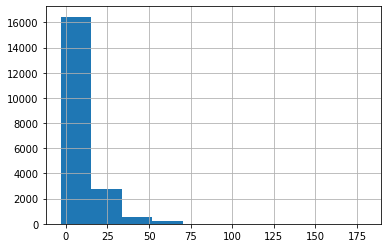

In [3]:
# Target Variable is fare_amount 
# Check if it is classification or regression 
taxi_train.fare_amount.hist()
plt.show()

#### Distribution of Target variable shows it is Continous Variable i.e Regression Problem

In [4]:
# SIZE of the data 
print(taxi_train.shape)
print(taxi_test.shape)

(20000, 8)
(9914, 7)


In [5]:
# Columns in the data 
taxi_train.columns.to_list()

['id',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [6]:
# DESCRIBE the data to get basic statistics 
taxi_train.describe()

,id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,5773.647028,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,0.000000,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,4999.750000,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,9999.500000,8.500000,-73.981711,40.752680,-73.980217,40.753583,1.000000
75%,14999.250000,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,19999.000000,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


#### Inspect the describe output, we can see min(fare_amount) =-3, which doesn't seem to be valid. 

In [7]:
# Distribution of Passanger count 
taxi_train.passenger_count.value_counts()

1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64

### Intuitively, fare amount should increase with distance
    1. Lets visualize fare amount and distance of the ride
    2. distance needs to be calculated using the longitudes and latitudes

In [10]:
# Distance in kms calculated using haversize_disttance
taxi_train['distance_kms'] = haversine_distance(taxi_train)
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_kms
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [12]:
taxi_train.describe()

,id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_kms
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000,16.662382
std,5773.647028,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674,332.019170
min,0.000000,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000,0.000000
25%,4999.750000,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000,1.221310
50%,9999.500000,8.500000,-73.981711,40.752680,-73.980217,40.753583,1.000000,2.137610
75%,14999.250000,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000,3.859920
max,19999.000000,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000,8667.542104


Notice, max(distance_kms) = 8667 and mean value = 16.6, It means there are outliers

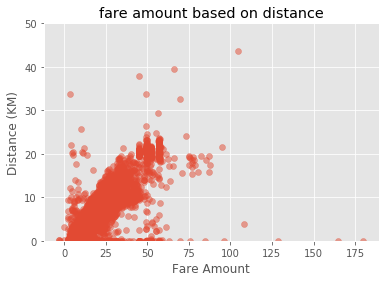

In [13]:
# Scatter plot between fare amount and distance 
plt.style.use("ggplot")
plt.scatter(x=taxi_train['fare_amount'], y= taxi_train['distance_kms'], alpha=0.5)
plt.xlabel('Fare Amount')
plt.ylabel('Distance (KM)')
plt.title("fare amount based on distance")
plt.ylim(0, 50) # To avoid outliers, some outliers disturb the visualization
plt.show()

`It's obvious now that there is a clear dependency between ride distance and fare amount. So, ride distance is, probably, a good feature`

In [14]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

### Another idea that comes to mind is that the price of a ride could change during the day.
1. plot/visualize the median fare amount for each hour of the day
    - Find the feature hour of day from the date time feature 
    - Group the data using hour and find the median 

In [15]:
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_kms
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [16]:
# get the hour feature 
taxi_train['hour'] = pd.to_datetime(taxi_train.pickup_datetime).dt.hour
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_kms,hour
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7


In [17]:
# check if we have data for each hour 
taxi_train.hour.value_counts()

19    1239
18    1221
20    1181
22    1146
21    1127
14     998
13     997
12     996
23     974
17     973
9      958
15     917
11     902
8      875
10     850
16     819
7      797
0      768
1      594
6      428
2      416
3      359
4      258
5      207
Name: hour, dtype: int64

In [18]:
# plot the median fare amount for each hour of the data 
hour_price = taxi_train.groupby(by='hour', as_index=False)['fare_amount'].median()
hour_price.head()

,hour,fare_amount
0,0,9.5
1,1,9.0
2,2,9.0
3,3,9.3
4,4,9.7


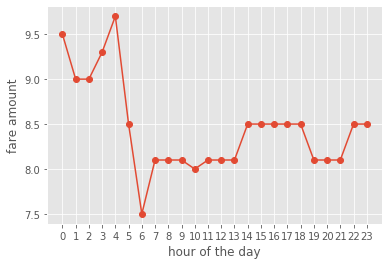

In [19]:
plt.plot(hour_price['hour'], hour_price['fare_amount'], 'o-')
plt.xlabel('hour of the day')
plt.ylabel('fare amount')
plt.xticks(range(24))
plt.show()

`We see that prices are a bit higher during the night(between 0 to 5 hour). It is a good indicator that we should include the "hour" feature in the final model, or at least add a binary feature "is_night"`

## Validation Stratergies 

In [2]:
from sklearn import datasets

In [22]:
# Iris data 
iris = datasets.load_iris()
iris_features = iris.data
iris_target = iris.target
print(iris_features.shape, iris_target.shape)

(150, 4) (150,)


In [23]:
iris_df = pd.DataFrame(iris_features, columns=iris.feature_names)
iris_df['target'] = iris_target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


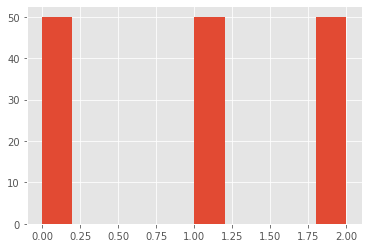

In [25]:
# See the target variable distribution
iris_df.target.hist()
plt.show()

`It is a classification problem`

In [26]:
# See the distribution of target values in total data
iris_df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

### K-fold Cross Validation 

In [27]:
from sklearn.model_selection import KFold

In [28]:
kf = KFold(n_splits=3, shuffle=True, random_state=123)

In [39]:
# let divide the features in 3 folds 
fold=0
for train_idx, test_idx in kf.split(iris_df):
    cv_train, cv_test = iris_df.iloc[train_idx], iris_df.iloc[test_idx]
    print(f"Fold no {fold}")
    print(f'Shape of train: {cv_train.shape} & test : {cv_test.shape}')
    print(f'Distribution of target:\n{cv_train.target.value_counts()}', end='\n\n')
    fold+=1

Fold no 0
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
1    39
2    31
0    30
Name: target, dtype: int64

Fold no 1
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
2    35
1    33
0    32
Name: target, dtype: int64

Fold no 2
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
0    38
2    34
1    28
Name: target, dtype: int64



### Distribution of target variable
1. Distribution in different folds is different from each other and also different from distribution in the total data.
2. In total data distribution of 3 classes is (33.33, 33.33, 33.33) percent
3. This difference in distribution can cause `problem when we have high class unbalance`
    - Solution : `Stratified kfold cross validation`

### Stratified kfold cross validation
1. Need to provide the `target` to obj.split()

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

In [44]:
# let divide the features in 3 folds 
fold=0
for train_idx, test_idx in skf.split(iris_df, iris_df['target']):
    cv_train, cv_test = iris_df.iloc[train_idx], iris_df.iloc[test_idx]
    print(f"Fold no {fold}")
    print(f'Shape of train: {cv_train.shape} & test : {cv_test.shape}')
    print(f'Distribution of target:\n{cv_train.target.value_counts()}', end='\n\n')
    fold+=1

Fold no 0
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
2    34
1    33
0    33
Name: target, dtype: int64

Fold no 1
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
1    34
2    33
0    33
Name: target, dtype: int64

Fold no 2
Shape of train: (100, 5) & test : (50, 5)
Distribution of target:
0    34
2    33
1    33
Name: target, dtype: int64



`See the distribution of target variable across folds is same as distribution in total data`

In [3]:
## Time series data 

In [4]:
# Demand Forecasting Data 
demand_train = pd.read_csv("datasets/demand_forecasting/demand_forecasting_train_1_month.csv")
demand_test = pd.read_csv("datasets/demand_forecasting/demand_forecasting_test.csv")
print(demand_train.shape, demand_test.shape)

(15500, 5) (45000, 4)


In [5]:
demand_train.head()

,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


In [6]:
demand_test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


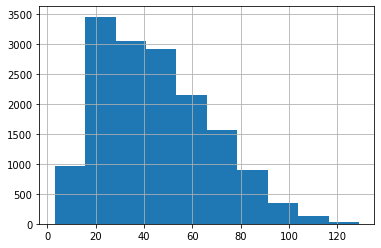

In [7]:
# sales is the target variable 
demand_train.sales.hist()
plt.show()

`This is Regression Problem`

In [8]:
# See the basic stats 
demand_train.describe()

,id,store,item,sales
count,15500.000000,15500.000000,15500.000000,15500.000000
mean,107749.500000,5.500000,25.500000,44.849677
std,4474.608921,2.872374,14.431335,22.617654
min,100000.000000,1.000000,1.000000,3.000000
25%,103874.750000,3.000000,13.000000,26.000000
50%,107749.500000,5.500000,25.500000,42.000000
75%,111624.250000,8.000000,38.000000,60.000000
max,115499.000000,10.000000,50.000000,129.000000


In [9]:
demand_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15500 non-null  int64 
 1   date    15500 non-null  object
 2   store   15500 non-null  int64 
 3   item    15500 non-null  int64 
 4   sales   15500 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 605.6+ KB


In [10]:
demand_train.store.value_counts()

7     1550
6     1550
5     1550
4     1550
3     1550
10    1550
2     1550
9     1550
1     1550
8     1550
Name: store, dtype: int64

In [62]:
# demand_train.item.value_counts()

### Time Kfold Cross Validation 
1. Good for time series data 
2. Sort the data on basis of time feature before doing the splits 

In [11]:
from sklearn.model_selection import TimeSeriesSplit

In [12]:
timekFold = TimeSeriesSplit(n_splits=5)

In [15]:
print(f'Total data size: {demand_train.shape}')

Total data size: (15500, 5)


In [21]:
# SORT the DATA 
demand_train = demand_train.sort_values(by='date')

In [22]:
fold =0 
for train_idx, test_idx in timekFold.split(demand_train):
    cv_train, cv_test = demand_train.iloc[train_idx], demand_train.iloc[test_idx]
    print(f'Fold no: {fold}')
    print(f'train_idx: {train_idx}')
    print(f'test_idx: {test_idx}')
    print(f'Size of train: {cv_train.shape} & test: {cv_test.shape}')
    print(f'Train date range: {cv_train.date.min()} to {cv_train.date.max()}')
    print(f'Test date range: {cv_test.date.min()} to {cv_test.date.max()}', end='\n\n')
    fold+=1

Fold no: 0
train_idx: [   0    1    2 ... 2582 2583 2584]
test_idx: [2585 2586 2587 ... 5165 5166 5167]
Size of train: (2585, 5) & test: (2583, 5)
Train date range: 2017-12-01 to 2017-12-06
Test date range: 2017-12-06 to 2017-12-11

Fold no: 1
train_idx: [   0    1    2 ... 5165 5166 5167]
test_idx: [5168 5169 5170 ... 7748 7749 7750]
Size of train: (5168, 5) & test: (2583, 5)
Train date range: 2017-12-01 to 2017-12-11
Test date range: 2017-12-11 to 2017-12-16

Fold no: 2
train_idx: [   0    1    2 ... 7748 7749 7750]
test_idx: [ 7751  7752  7753 ... 10331 10332 10333]
Size of train: (7751, 5) & test: (2583, 5)
Train date range: 2017-12-01 to 2017-12-16
Test date range: 2017-12-16 to 2017-12-21

Fold no: 3
train_idx: [    0     1     2 ... 10331 10332 10333]
test_idx: [10334 10335 10336 ... 12914 12915 12916]
Size of train: (10334, 5) & test: (2583, 5)
Train date range: 2017-12-01 to 2017-12-21
Test date range: 2017-12-21 to 2017-12-26

Fold no: 4
train_idx: [    0     1     2 ... 1291

`See the range of train and test idx, you will get to know how splitting is done`

## Overall Validation Score 
1. Mean 
    - Not very good
    - Don't take into account std deviation across the folds 
2. Mean (+-) stdev 
    - Subtract or add stdev from mean according to worst case scenario that's the better score than mean
    - Take std deviation across the folds in account 
    

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
def get_fold_mse(fold_obj, data):
    '''
    returns mse loss for different folds 
    '''
    folds_mse = []
    for train_idx, test_idx in fold_obj.split(data):
        cv_train, cv_test = data.iloc[train_idx], data.iloc[test_idx]
        # use random forest 
        model =RandomForestRegressor(n_estimators=10, random_state=123)
        # use features store and item 
        model.fit(X=cv_train[['store', 'item']], y=cv_train['sales'])
        # predict the labels in test data
        predictions = model.predict(X=cv_test[['store', 'item']])
        # find the loss 
        mse = round(mean_squared_error(cv_test['sales'], predictions),5)
        folds_mse.append(mse)
    return folds_mse

In [27]:
# Time Series Kfold object 
tkf = TimeSeriesSplit(n_splits=3)

In [28]:
mse_scores = get_fold_mse(tkf, demand_train)

In [29]:
print(f'mse scores: {mse_scores}')
print(f'mean score: {np.mean(mse_scores)}')
print(f'std: {np.std(mse_scores)}')

mse scores: [88.36773, 83.90682, 91.02002]
mean score: 87.76485666666666
std: 2.9350747579386973


In [32]:
print(f'Overall Score: {np.mean(mse_scores) + np.std(mse_scores)}')

Overall Score: 90.69993142460535


`We saw different Validation Stratergies and Overall Score which approximates the Private data set score, try to choose the model which has this Overall score better`

## Feature Engineering 
1. Creating new features 
2. How to find the possible new features that will work for problem
    - `DOMAIN KNOWLEDGE plays very important role in it`

In [18]:
# House Price Prediction data set 
house_train = pd.read_csv("datasets/house_price/house_prices_train.csv")
house_test = pd.read_csv("datasets/house_price/house_prices_test.csv")
print(f'Train shape: {house_train.shape} \nTest Shape: {house_test.shape}')

Train shape: (1460, 17) 
Test Shape: (1459, 16)


In [3]:
house_train.columns

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'RoofStyle', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [4]:
house_train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [5]:
house_train.describe()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,1971.267808,1057.429452,1162.626712,346.992466,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,180921.195890
std,421.610009,9981.264932,1.382997,30.202904,438.705324,386.587738,436.528436,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,5.000000,1954.000000,795.750000,882.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,730.500000,9478.500000,6.000000,1973.000000,991.500000,1087.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,2000.000000,1298.250000,1391.250000,728.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,214000.000000
max,1460.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


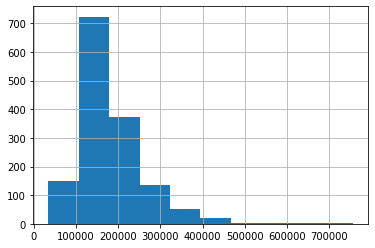

In [6]:
# Target variable
house_train.SalePrice.hist()
plt.show()

`Regression Problem`

In [15]:
def get_kfold_rmse(fold_obj, data):
    '''
    returns overall validation score 
    '''
    rmse_scores = [] 
    for train_idx, test_idx in fold_obj.split(data):
        cv_train, cv_test = data.iloc[train_idx], data.iloc[test_idx]
        feats = [col for col in data.columns if col not in {'Id','RoofStyle', 'CentralAir', 'SalePrice'}]
        # print(feats)
        # use random forest 
        model =RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)
        # use features store and item 
        model.fit(X=cv_train[feats], y=cv_train['SalePrice'])
        # predict the labels in test data
        predictions = model.predict(X=cv_test[feats])
        # find the loss 
        rmse = np.sqrt(mean_squared_error(cv_test['SalePrice'], predictions))
        rmse_scores.append(rmse)
    
    overall_score = round(np.mean(rmse_scores) + np.std(rmse_scores),2)
    return overall_score


In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [17]:
print('Overall RMSE before feature engineering: {}'.format(get_kfold_rmse(kf, house_train)))

Overall RMSE before feature engineering: 36029.39


### `Arithmetical Features`

Ideally we should combine train and test, then create new features, here just for experimental purpose, we are not doing that

In [18]:
# Add feature 'Total Surface Area'
house_train['TotalSF'] = house_train['TotalBsmtSF'] + house_train['1stFlrSF'] + house_train['2ndFlrSF']
print('Overall RMSE after adding TotalSF: {}'.format(get_kfold_rmse(kf, house_train)))

Overall RMSE after adding TotalSF: 35073.2


`Validation Score improve so we will keep this feature`

In [19]:
# Add feature 'Garden area'
house_train['garden_area'] = house_train['LotArea'] - house_train['1stFlrSF']
print('Overall RMSE after adding garden area: {}'.format(get_kfold_rmse(kf, house_train)))

Overall RMSE after adding garden area: 34413.55


`Validation Score improve so we will keep this feature`

In [20]:
# Add feature `total bathrooms` 
house_train['totalBathroom'] = house_train['FullBath'] + house_train['HalfBath']
print('Overall RMSE after adding Total bathroom: {}'.format(get_kfold_rmse(kf, house_train)))

Overall RMSE after adding Total bathroom: 34506.78


`Validation Score not improved so we will discard this feature`

## `Date Features`

In [21]:
# taxi data 
print(f'Taxi train : {taxi_train.shape} & test : {taxi_test.shape}')

Taxi train : (20000, 8) & test : (9914, 7)


In [22]:
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [23]:
taxi_test.head()

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [24]:
taxi_train['id'].max()

19999

In [25]:
# Change the 'id' of taxi_test data 
taxi_test['id'] = taxi_test['id'] + 19999 + 1 
print(f'Max id in test: {taxi_test.id.max()} and min: {taxi_test.id.min()}')

Max id in test: 29913 and min: 20000


### Combine the train and test to create new features 
1. Make sure the 'id' column in train and test data is mutually exclusive

In [26]:
taxi_data = pd.concat([taxi_train, taxi_test])
print(f'Total data : {taxi_data.shape}')
taxi_data.columns

Total data : (29914, 8)


Index(['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [27]:
taxi_data.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [28]:
# Convert pickup_datetime to datetime object
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
taxi_data.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [29]:
# Add new feature 'hour-of-day' and 'day-of-week'
taxi_data['hour'] = taxi_data['pickup_datetime'].dt.hour

taxi_data['dayOfWeek'] = taxi_data['pickup_datetime'].dt.dayofweek
taxi_data.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,dayOfWeek
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,5
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1


### Now separate the train and test data after feature engineering 

In [30]:
taxi_train_data = taxi_data[taxi_data['id'].isin(taxi_train['id'])]
taxi_test_data = taxi_data[taxi_data.id.isin(taxi_test.id)]
print(f'Taxi train: {taxi_train_data.shape} & Taxi test: {taxi_test_data.shape}')

Taxi train: (20000, 10) & Taxi test: (9914, 10)


In [31]:
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
taxi_test.head()

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,20000,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,20001,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,20002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,20003,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,20004,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


## Categorical Features 
1. Label Encoder: Map categories to numbers 
2. One-Hot Encoding 

**Ideally we should combine train and test data then do feature engineering, but for e.g purpose here only taking train data**

In [33]:
## house price prediction data set 
house_train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalSF,garden_area,totalBathroom
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500,2566,7594,3
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500,2524,8338,2
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500,2706,10330,3
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000,2473,8589,1
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000,3343,13115,3


## Label Encoder
1. 2 Categorical features 'RoofStyle' and 'CentralAir'


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
house_train['RoofStyle_enc'] = le.fit_transform(house_train['RoofStyle'])
le

LabelEncoder()

In [36]:
le.classes_
# We can use the same object of LabelEncoder() to fit another data

array(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], dtype=object)

In [37]:
house_train['CentralAir_enc'] = le.fit_transform(house_train['CentralAir'])

In [38]:
le.classes_

array(['N', 'Y'], dtype=object)

In [39]:
house_train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,...,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalSF,garden_area,totalBathroom,RoofStyle_enc,CentralAir_enc
0,1,8450,7,2003,Gable,856,Y,856,854,2,...,1,8,2,548,208500,2566,7594,3,1,1
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,...,1,6,2,460,181500,2524,8338,2,1,1
2,3,11250,7,2001,Gable,920,Y,920,866,2,...,1,6,2,608,223500,2706,10330,3,1,1
3,4,9550,7,1915,Gable,756,Y,961,756,1,...,1,7,3,642,140000,2473,8589,1,1,1
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,...,1,9,3,836,250000,3343,13115,3,1,1


`Central Air is binary feature so we can use LabelEncoder for it, but RoofStyle has 6 classes, so LabelEncoder produce Ranking Dependency so Better to use one-hot encoding`

In [40]:
# Drop the TotalBathroom feature because that degraded the validation score 
house_train.drop(columns='totalBathroom', inplace=True)
print(house_train.columns)
print('Overall RMSE after processing Categorical features: {}'.format(get_kfold_rmse(kf, house_train)))

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'RoofStyle', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SalePrice', 'TotalSF', 'garden_area', 'RoofStyle_enc',
       'CentralAir_enc'],
      dtype='object')
Overall RMSE after processing Categorical features: 34422.96


#### `Here we added two new features simultaneously, we can't say for sure due to which feature score is worse than before. NEED TO TWEAK ONE THING AT A TIME` 

## One Hot Encoding 
1. Removes Ranking dependency
2. Not good when there are many categories, it leads to many features 
3. Code 
    - `pd.get_dummies()`

In [40]:
ohe = pd.get_dummies(house_train['RoofStyle'], prefix='RoofStyle')
ohe.head()

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [41]:
## Add these feature to main dataframe 
house_train = pd.concat([house_train, ohe], axis=1)
house_train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,...,TotalSF,garden_area,RoofStyle_enc,CentralAir_enc,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,8450,7,2003,Gable,856,Y,856,854,2,...,2566,7594,1,1,0,1,0,0,0,0
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,...,2524,8338,1,1,0,1,0,0,0,0
2,3,11250,7,2001,Gable,920,Y,920,866,2,...,2706,10330,1,1,0,1,0,0,0,0
3,4,9550,7,1915,Gable,756,Y,961,756,1,...,2473,8589,1,1,0,1,0,0,0,0
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,...,3343,13115,1,1,0,1,0,0,0,0


In [47]:
house_train[[col for col in house_train.columns if 'RoofStyle' in col]].head()
# with 'in' operation we match 'RoofStyle' with strings having 'RoofStyle' as substring

,RoofStyle,RoofStyle_enc,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,Gable,1,0,1,0,0,0,0
1,Gable,1,0,1,0,0,0,0
2,Gable,1,0,1,0,0,0,0
3,Gable,1,0,1,0,0,0,0
4,Gable,1,0,1,0,0,0,0


True

# Modeling

## Baseline Models 
    1. We will create baseline models on taxi data 

## Validation Stratergy 
    1. 70% train 30% hold out 
    
## Loss 
    1. RMSE

In [6]:
# taxi data 
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
taxi_test.head()

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


`fare_amount is the target variable`

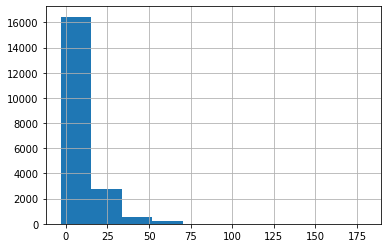

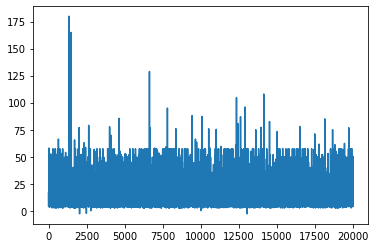

In [9]:
taxi_train.fare_amount.hist()
plt.show()
plt.plot(taxi_train.fare_amount)
plt.show()

`It is a Regression Problem`

#### Create a new feature 'hour'

In [11]:
taxi_train.columns

Index(['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [12]:
taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = pd.to_datetime(taxi_test.pickup_datetime)
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
taxi_train['hour'] = taxi_train.pickup_datetime.dt.hour
taxi_test['hour'] = taxi_test.pickup_datetime.dt.hour
taxi_train.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7


In [14]:
# Shape of data 
print(f'Shape of train: {taxi_train.shape}')
print(f'Shape of test: {taxi_test.shape}')

Shape of train: (20000, 9)
Shape of test: (9914, 8)


In [15]:
# split the data in validation train and test 
val_train, val_test = train_test_split(taxi_train, test_size=0.3, random_state=123)
print(f'Shape of validation-train: {val_train.shape}')
print(f'Shape of validation-test: {val_test.shape}')

Shape of validation-train: (14000, 9)
Shape of validation-test: (6000, 9)


`Baseline Model1: Assign average value`

In [16]:
avg_fare = np.mean(val_train.fare_amount)
print(f'Average fare in validation train: {avg_fare}')

Average fare in validation train: 11.305263571428583


In [19]:
val_test['predictions_model_1'] = avg_fare 
taxi_test['predictions_model_1'] = avg_fare

/home/mr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Score on hold-out set and Public data set 
val_rmse_1 = np.sqrt(mean_squared_error(val_test.fare_amount, val_test.predictions_model_1))
# pub_rmse_1 = np.sqrt(mean_squared_error(taxi_test.fare_amount, taxi_test.predictions_model_1))
print(f'Validation score: {val_rmse_1}')
# print(f'Public score: {pub_rmse_1}')

AttributeError: 'DataFrame' object has no attribute 'fare_amount'